### Import Libraries

In [347]:
import pandas as pd
import datetime
import random
import numpy as np

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

### Declare Settings

In [350]:
%matplotlib inline

### Generate Date Data Frame

In [328]:
def GenerateDataDF(begDate, endDate, filterWeekends=True, filterHourList=[]):
    numdays=(endDate-begDate).days
    dateList=[(begDate-datetime.timedelta(days=x)) for x in range(0, numdays)]
    dateStringList=[x.strftime("%Y-%m-%d") for x in dateList]
    dayOfWeekList=[x.weekday() for x in dateList]
    dateDF=pd.DataFrame({"Key":[1]*len(dateList),"Date":dateStringList, "DayOfWeek":dayOfWeekList})
    if filterWeekends:
        dateDF=dateDF[(dateDF["DayOfWeek"]!=6) & (dateDF["DayOfWeek"]!=5)]
    dateDF=pd.concat([dateDF,pd.get_dummies(dateDF["DayOfWeek"], prefix="DayOfWeek")], axis=1)
    hourDF=pd.DataFrame({"Key":[1]*len(list(range(24))), "Hour":list(range(24))})
    if len(filterHourList)>0:
        hourDF=hourDF[~hourDF["Hour"].isin(filterHourList)]
    hourDF=pd.concat([hourDF,pd.get_dummies(hourDF["Hour"], prefix="Hour")], axis=1) 
    dateDF=dateDF.merge(hourDF, how="outer", on="Key")

    dateDF.drop("Key", axis=1, inplace=True) 
    return dateDF

In [329]:
begDate=datetime.datetime(2019,5,1)
endDate=datetime.datetime(2019,8,1)

In [330]:
dataDF=GenerateDataDF(begDate,endDate, filterHourList=[0,1,2,3,4,21,22,23])

In [331]:
dataDF.T

,0,1,2,3,4,5,6,7,8,9,...,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055
Date,2019-05-01,2019-05-01,2019-05-01,2019-05-01,2019-05-01,2019-05-01,2019-05-01,2019-05-01,2019-05-01,2019-05-01,...,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
DayOfWeek,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
DayOfWeek_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DayOfWeek_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DayOfWeek_2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DayOfWeek_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DayOfWeek_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hour,5,6,7,8,9,10,11,12,13,14,...,11,12,13,14,15,16,17,18,19,20
Hour_5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hour_6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Generate Fake Data

In [332]:
#Generate Fake Log Data
for clusterCount in range(8):
    indexList=random.sample(range(len(dateDF)),900)
    dayOfWeekList=list(dateDF.iloc[indexList]["DayOfWeek"])
    dateList=list(dateDF.iloc[indexList]["Date"])
    hourList=list(dateDF.iloc[indexList]["Hour"])
    countList=[random.randint(1,10000) for i in indexList]
    countDF=pd.DataFrame({"Date":dateList, "DayOfWeek":dayOfWeekList, "Hour": hourList, "Cluster"+str(clusterCount):countList})
    dataDF=dataDF.merge(countDF, left_on=["Date", "DayOfWeek","Hour"],right_on=["Date", "DayOfWeek","Hour"], how="left")
dataDF.fillna(0,inplace=True)

In [413]:
countDF.head()

,Date,DayOfWeek,Hour,Cluster7
0,2019-02-22,4,6,6034
1,2019-02-08,4,7,6782
2,2019-01-30,2,12,8506
3,2019-01-30,2,6,2076
4,2019-02-27,2,5,1449


In [333]:
dataDF.columns

Index(['Date', 'DayOfWeek', 'DayOfWeek_0', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'Hour', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4',
       'Cluster5', 'Cluster6', 'Cluster7'],
      dtype='object')

In [415]:
dataDF.head().T

,0,1,2,3,4
Date,2019-05-01,2019-05-01,2019-05-01,2019-05-01,2019-05-01
DayOfWeek,2,2,2,2,2
DayOfWeek_0,0,0,0,0,0
DayOfWeek_1,0,0,0,0,0
DayOfWeek_2,1,1,1,1,1
DayOfWeek_3,0,0,0,0,0
DayOfWeek_4,0,0,0,0,0
Hour,5,6,7,8,9
Hour_5,1,0,0,0,0
Hour_6,0,1,0,0,0


### Model

In [365]:
xNames=['DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4','Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20']

clusterNames=['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4',
       'Cluster5', 'Cluster6', 'Cluster7']

C:\Users\kamal\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


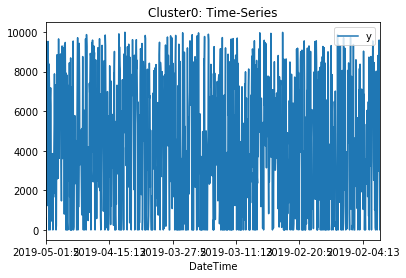

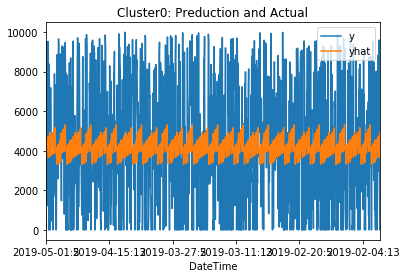

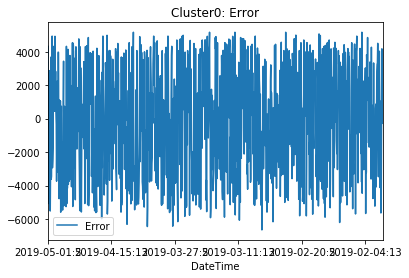

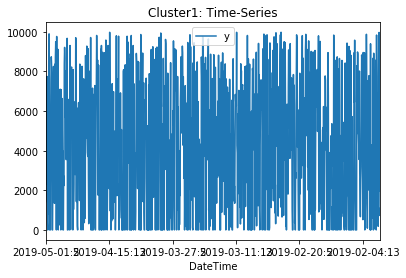

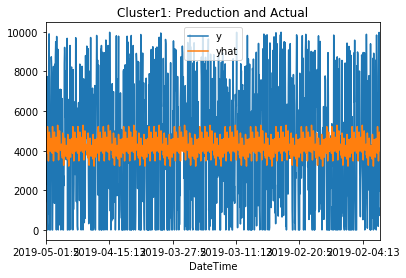

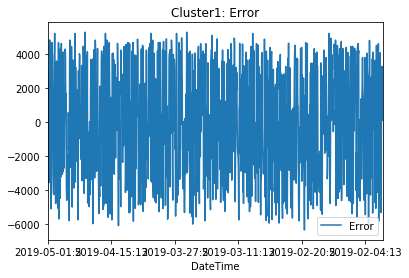

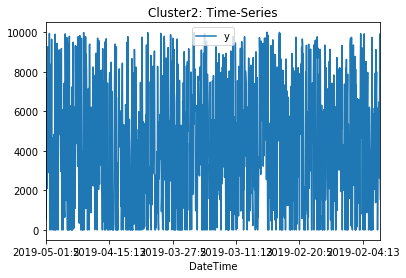

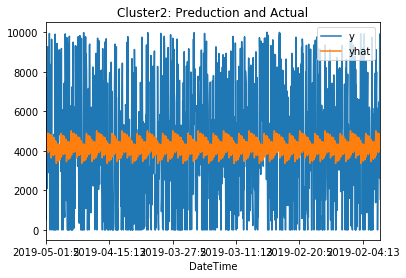

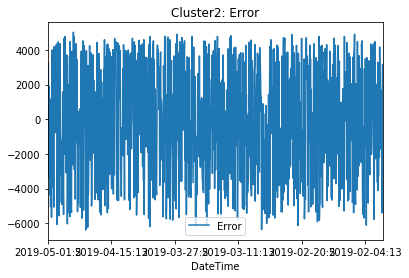

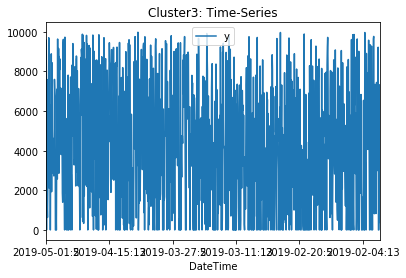

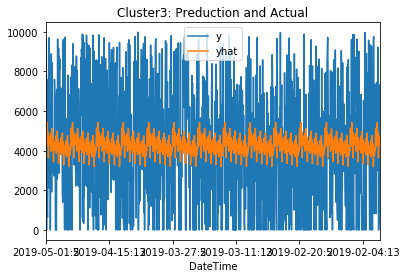

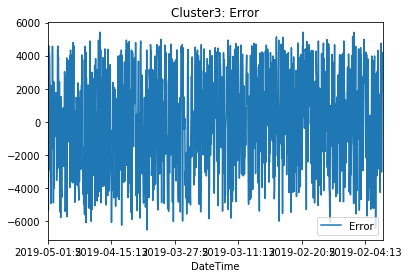

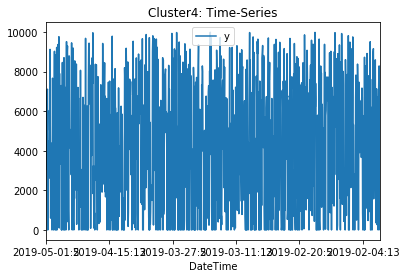

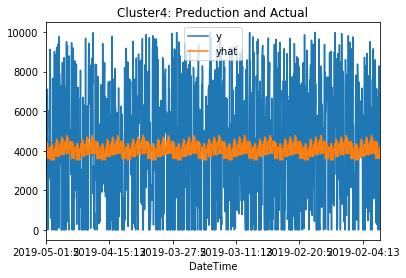

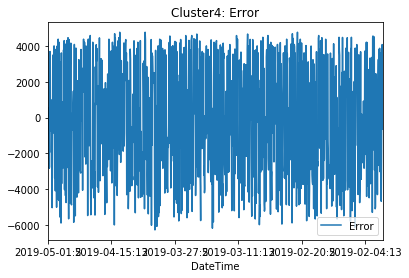

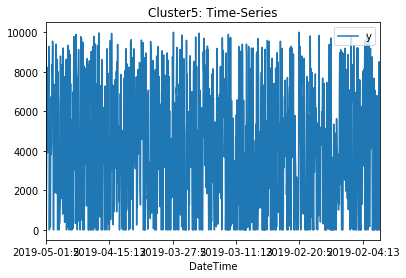

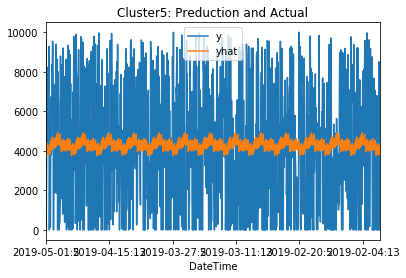

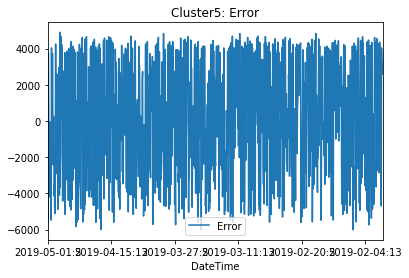

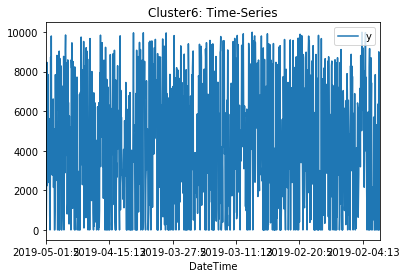

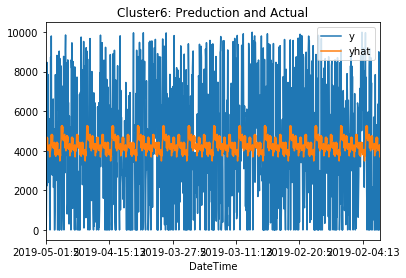

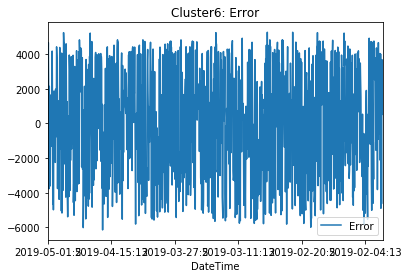

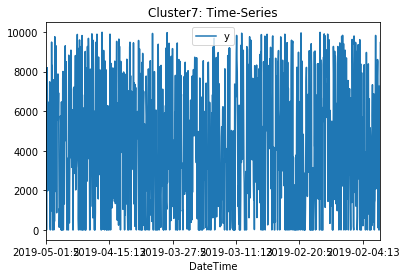

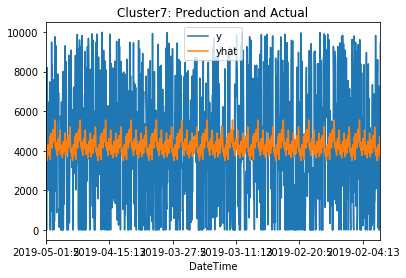

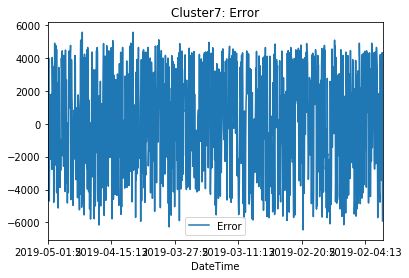

In [370]:
for cluster in clusterNames:
    poisson_model = sm.GLM(dateDF[cluster], dateDF[xNames], family= sm.families.family.Poisson())
    poisson_model_fit=poisson_model.fit()

    yHat=poisson_model_fit.predict()
    predictDF=pd.DataFrame({"DateTime":dataDF["Date"]+":"+dataDF["Hour"].astype(str), "y":dataDF[cluster], "yhat":yHat})
    errorDF=pd.DataFrame({"DateTime":dataDF["Date"]+":"+dataDF["Hour"].astype(str), "Error":yHat-dataDF[cluster]})

    predictDF[["DateTime", "y"]].plot(x="DateTime", title=cluster+": Time-Series")
    predictDF.plot(x="DateTime", title=cluster+": Preduction and Actual")
    errorDF.plot(x="DateTime", title=cluster+": Error")

### String Merge

In [400]:
import nltk
from nltk.tokenize import sent_tokenize

In [401]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [403]:
emma_text = nltk.corpus.gutenberg.sents('austen-emma.txt')
bible_text= nltk.corpus.gutenberg.sents('bible-kjv.txt')

In [411]:
k=1000
sampleIndex=random.sample(range(len(bible_text)),k=k)
sentenceList=[" ".join(bible_text[i]) for i in sampleIndex]
sentenceDF=pd.DataFrame({"Text":sentenceList})
uniqueSentenceList=list(set(sentenceList))
clusterDF()


In [412]:
sentenceDF.head(25)

,Text
0,"12 : 56 Ye hypocrites , ye can discern the fac..."
1,"15 : 4 And Heshbon shall cry , and Elealeh : t..."
2,13 : 29 If a man or woman have a plague upon t...
3,14 : 1 Every wise woman buildeth her house : b...
4,"16 : 19 And again , whom should I serve ?"
5,6 : 14 And David danced before the LORD with a...
6,"7 : 5 Thine head upon thee is like Carmel , an..."
7,"Then David departed , and came into the forest..."
8,"12 : 33 This he said , signifying what death h..."
9,19 : 14 And fire is gone out of a rod of her b...


In [405]:
sampleIndex

[19383,
 7172,
 29485,
 3669,
 13024,
 23396,
 7602,
 9125,
 25778,
 10767,
 12473,
 15722,
 971,
 14299,
 13173,
 16052,
 700,
 4765,
 11473,
 3027,
 24257,
 10109,
 22572,
 15487,
 25310,
 24780,
 25041,
 25170,
 27049,
 2818,
 28490,
 27148,
 20438,
 11847,
 14636,
 24951,
 3283,
 5921,
 6032,
 4766,
 12458,
 24215,
 25508,
 15730,
 27077,
 21415,
 14672,
 17620,
 16634,
 16375,
 7427,
 25770,
 27372,
 26617,
 12970,
 3453,
 20616,
 27895,
 22802,
 306,
 13956,
 21023,
 29755,
 810,
 25913,
 17602,
 20322,
 22625,
 18566,
 9921,
 25349,
 11178,
 10433,
 18081,
 25716,
 8410,
 26994,
 15354,
 18364,
 9061,
 9226,
 13836,
 14918,
 3202,
 2505,
 13139,
 15593,
 20907,
 13459,
 4508,
 15687,
 510,
 16220,
 19921,
 5137,
 18199,
 6026,
 25940,
 18817,
 742,
 12282,
 8946,
 25489,
 10240,
 18645,
 8454,
 5157,
 19126,
 11147,
 6087,
 8753,
 25720,
 29702,
 6522,
 20142,
 26131,
 27275,
 8581,
 19411,
 8661,
 20230,
 7921,
 20016,
 2798,
 18898,
 17867,
 28722,
 5131,
 797,
 17159,
 20200,

In [393]:
bible=nltk.corpus.gutenberg.sents('bible-kjv.txt')

In [397]:
len(bible)

30103